In [1]:
#Exploration (visualisation: chronogram, lag-plot, month-plot, ACF, PACF, ljung-box test of residuals, decomposition, normality test of D'Agostino, ADF stationary test, KPSS simple differentiation test, canova-hansen seasonality differentiation test)
#Analysis
#Evaluation

In [ ]:
!pip install statsforecast
!pip install mlforecast
!pip install hierarchicalforecast
!pip install darts
!pip install tradingeconomics

In [ ]:
pip install rpy2

# Importing Packages

In [2]:
import sys
import pandas as pd
import math
import numpy as np
import sklearn
import lightgbm as lgb
import torch

from mapie.regression import MapieRegressor
from mapie.metrics import regression_coverage_score
from uq360.algorithms.quantile_regression import QuantileRegression
from uq360.metrics import picp, mpiw

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn import metrics
import xgboost
from xgboost import XGBRegressor
import itertools
import datetime
from dateutil.relativedelta import relativedelta
import math
import statsmodels.api as sm
import scipy
from scipy.stats import anderson, boxcox, probplot
from scipy.special import inv_boxcox
from statsmodels.tools.eval_measures import rmse
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.graphics.tsaplots import month_plot, seasonal_plot, plot_acf, plot_pacf, quarter_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing
from statsmodels.stats.diagnostic import acorr_ljungbox as ljung
from statsmodels.tsa.statespace.tools import diff as diff
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from pmdarima import ARIMA, auto_arima
from scipy import signal
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from scipy.stats import jarque_bera as jb
from itertools import combinations
import rpy2
#from rpy2.robjects import pandas2ri
#pandas2ri.activate()
import warnings
warnings.filterwarnings("ignore")
np.random.seed(786)
#import fbprophet as Prophet

#Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
#plt.style.use('seaborn-white')
from matplotlib import style
pd.plotting.register_matplotlib_converters()
%matplotlib inline


: 

In [2]:
pd.options.display.max_columns=1000

# Exploration

In [3]:
#oildf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=crude-oil-brent&months=360")[1]
#coaldf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=coal-australian&months=360")[1]
#gasdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=natural-gas&months=360")[4]
#sugardf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=sugar&months=360")[4]
#oredf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=iron-ore&months=360")[1]
#copperdf = pd.read_html("https://www.indexmundi.com/commodities/?commodity=copper&months=360")[4]
com=pd.read_excel("marketpricefacts.xlsx")
#com=pd.read_csv("marketpricefacts (2).csv")
#com_=pd.read_csv("wfp_food_prices_cmr (1).csv", skiprows=[1])
#com_1=pd.read_csv('currencies.csv')
#com_infl=pd.read_csv('inflation_cmr.csv')

In [4]:
#com_infl=com_infl[['period_date', 'value']].rename(columns={'period_date':'date', 'value':'inflation_rate'}).reset_index().drop('index', axis=1)
#com_1=com_1[['Date', 'Close']].rename(columns={'Date':'date', 'Close':'exchange_rate'}).reset_index().drop('index', axis=1)

In [5]:
Kmp=com[com['dataseries_name'].str.contains('Kananga')]
K_maize=Kmp[Kmp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kananga_Maize_meal_price'}).reset_index().drop('index', axis=1)
K_maizeg=Kmp[Kmp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kananga_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Mbmp=com[com['dataseries_name'].str.contains('Mbuji-mayi')]
Mb_maize=Mbmp[Mbmp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Mbuji_Maize_meal_price'}).reset_index().drop('index', axis=1)
Mb_maizeg=Mbmp[Mbmp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Mbuji_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Kimp=com[com['dataseries_name'].str.contains('Kinshasa')]
Ki_maize=Kimp[Kimp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kinshasa_Maize_meal_price'}).reset_index().drop('index', axis=1)
Ki_maizeg=Kimp[Kimp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Kinshasa_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Lmp=com[com['dataseries_name'].str.contains('Lubumbashi')]
L_maize=Lmp[Lmp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Lumumbashi_Maize_meal_price'}).reset_index().drop('index', axis=1)
L_maizeg=Lmp[Lmp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'Lumumbashi_Maize_Grain_price'}).reset_index().drop('index', axis=1)

Smp=com[com['dataseries_name'].str.contains('South Africa')]
S_maize=Smp[Smp['product']=='Maize Meal (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'South_Africa_Maize_meal_price'}).reset_index().drop('index', axis=1)
S_maizeg=Smp[Smp['product']=='Maize Grain (White)'][["period_date","common_unit_price","exchange_rate"]].rename(columns={'common_unit_price':'South_Africa_Maize_Grain_price'}).reset_index().drop('index', axis=1)

In [6]:
#com[['country',"product",'cpcv2','cpcv2_description',"period_date","unit","common_unit_price", "common_currency_price", 'value_one_month_ago', "value","exchange_rate","dataseries_name"]]
maize_meal=pd.concat([K_maize[['period_date', 'exchange_rate']], K_maize.drop(['period_date', 'exchange_rate'], axis=1), Mb_maize.drop(['period_date', 'exchange_rate'], axis=1), L_maize.drop(['period_date', 'exchange_rate'], axis=1)], axis=1)
maize_grain=pd.concat([K_maizeg[['period_date', 'exchange_rate']], K_maizeg.drop(['period_date', 'exchange_rate'], axis=1), Mb_maizeg.drop(['period_date', 'exchange_rate'], axis=1), Ki_maizeg.drop(['period_date', 'exchange_rate'], axis=1)], axis=1)#adding L_maizeg
#maize_all=y_maize[['date', 'Yaounde price']], 


In [7]:
maize_meal=maize_meal.reset_index()

In [8]:
df=maize_meal.copy()
df.index = pd.to_datetime(df['period_date'])
df.drop(['period_date', 'index'], inplace = True, axis = 1)
#df.drop('date', inplace = True, axis = 1)

In [9]:
df_g=maize_grain.copy()
df_g.index = pd.to_datetime(df_g['period_date'])
df_g.drop('period_date', inplace = True, axis = 1)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 76 entries, 2017-01-31 to 2023-04-30
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   exchange_rate                75 non-null     float64
 1   Kananga_Maize_meal_price     75 non-null     float64
 2   Mbuji_Maize_meal_price       75 non-null     float64
 3   Lumumbashi_Maize_meal_price  71 non-null     float64
dtypes: float64(4)
memory usage: 3.0 KB


In [20]:
df.describe()

,exchange_rate,Kananga_Maize_meal_price,Mbuji_Maize_meal_price,Lumumbashi_Maize_meal_price
count,75.000000,75.000000,75.000000,71.000000
mean,0.000581,1232.178540,1345.318607,1072.733691
std,0.000080,572.326964,492.589039,451.117607
min,0.000488,617.500000,658.750000,605.000000
25%,0.000505,841.500000,1003.333333,800.553846
50%,0.000600,1153.000000,1238.200000,833.333333
75%,0.000640,1394.928571,1493.573770,1262.500000
max,0.000830,3883.000000,3500.000000,2600.000000


In [21]:
continuous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
print(continuous_features)

['exchange_rate', 'Kananga_Maize_meal_price', 'Mbuji_Maize_meal_price', 'Lumumbashi_Maize_meal_price']


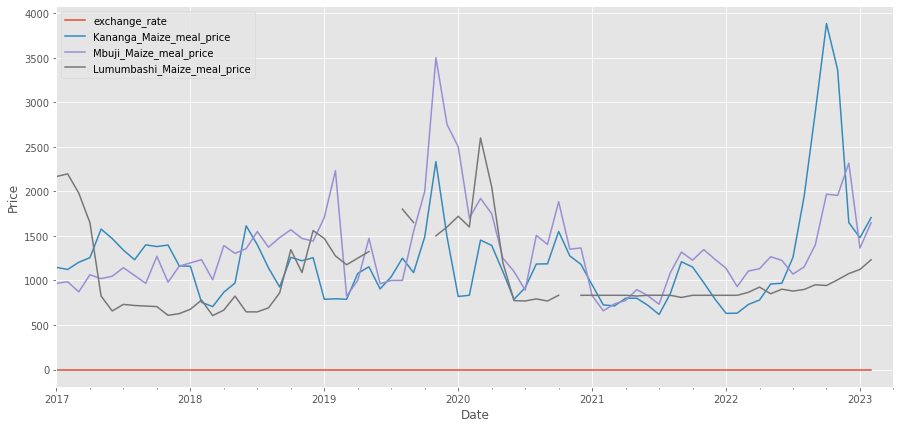

In [22]:
plt.rcParams['figure.figsize']=(15,7)
style.use('ggplot')
df.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

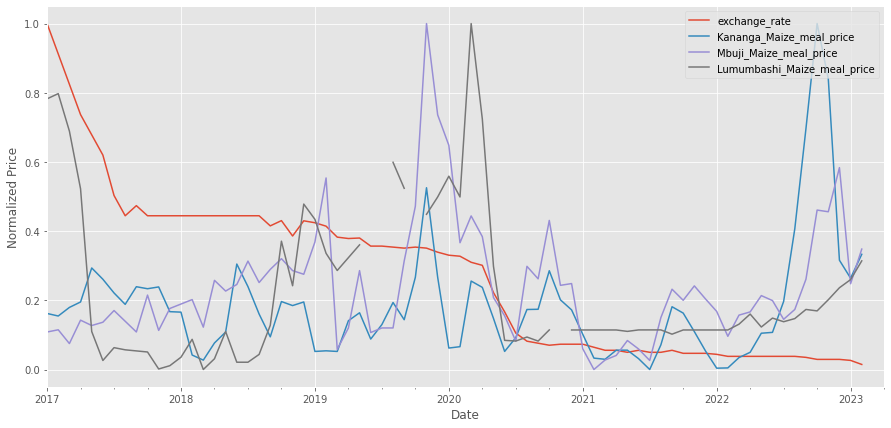

In [23]:
#Normalization can mislead since we don't have info about the scale or the values domain 
df_min_max_scaled = df.copy()
for column in df:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())
df_min_max_scaled.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Normalized Price')
plt.show()

In [24]:
continuous_features = [feature for feature in df_g.columns if df_g[feature].dtypes != 'O']
print(continuous_features)

['exchange_rate', 'Kananga_Maize_Grain_price', 'Mbuji_Maize_Grain_price', 'Kinshasa_Maize_Grain_price']


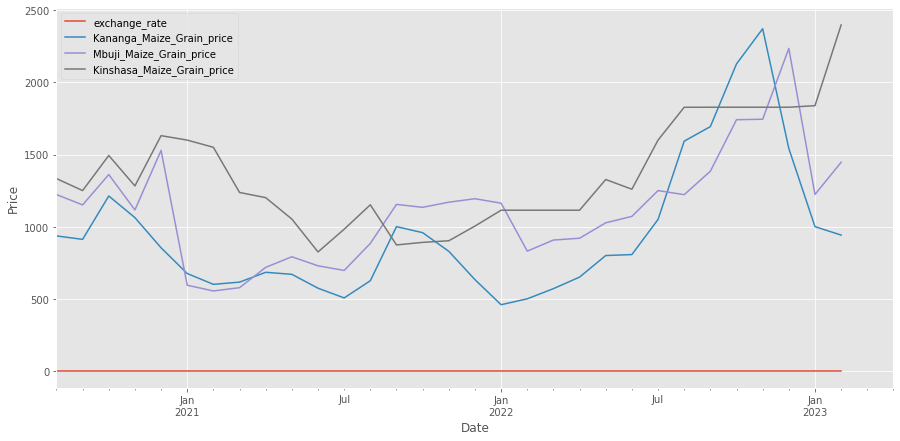

In [25]:
style.use('ggplot')
df_g.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [11]:
def adf_test(timeseries):
    dftest = adfuller(timeseries, autolag='AIC', regression='c')
    result = pd.Series(dftest[0:4], index=['Test Statistic','P-value','Lags Used','No of Observations'])
    for key,value in dftest[4].items():
        result['Critical Value (%s)'%key] = value
    return result

In [17]:
#['exchange_rate', 'Kananga_Maize_Grain_price', 'Mbuji_Maize_Grain_price', 'Kinshasa_Maize_Grain_price'] 'inflation_rate', 'exchange_rate', 'Bamenda price', 'Fundong price', 'Kumbo price', 'Ndop price', 'Nkambe price', 'Wum price'

#maize_meal[['exchange_rate']].fillna(value='NA').to_csv('maize_meal.csv', index=False)
#maize_meal[['Kananga_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_ka.csv', index=False)
#maize_meal[['Mbuji_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_mbu.csv', index=False)
#maize_meal[['Lumumbashi_Maize_meal_price']].fillna(value='NA').to_csv('maize_meal_ki.csv', index=False)
maize_meal=maize_meal.fillna(value='NA')
maize_meal[['inflation_rate']].to_csv('inflation_rate.csv', index=False)
maize_meal[['Bamenda price']].to_csv('Bamenda_price.csv', index=False)
maize_meal[['Fundong price']].to_csv('Fundong_price.csv', index=False)
maize_meal[['Kumbo price']].to_csv('Kumbo_price.csv', index=False)
maize_meal[['Ndop price']].to_csv('Ndop_price.csv', index=False)
maize_meal[['Nkambe price']].to_csv('Nkambe_price.csv', index=False)
maize_meal[['Wum price']].to_csv('Wum_price.csv', index=False)

In [12]:
# imputed missing values using Kalman smoothing
maize_meal_1=pd.read_csv('rate.csv')
maize_meal_2=pd.read_csv('ka.csv')
maize_meal_3=pd.read_csv('mbu.csv')
maize_meal_4=pd.read_csv('ki.csv')
maize_meal=pd.concat([maize_meal[['period_date']], maize_meal_1, maize_meal_2, maize_meal_3, maize_meal_4], axis=1)

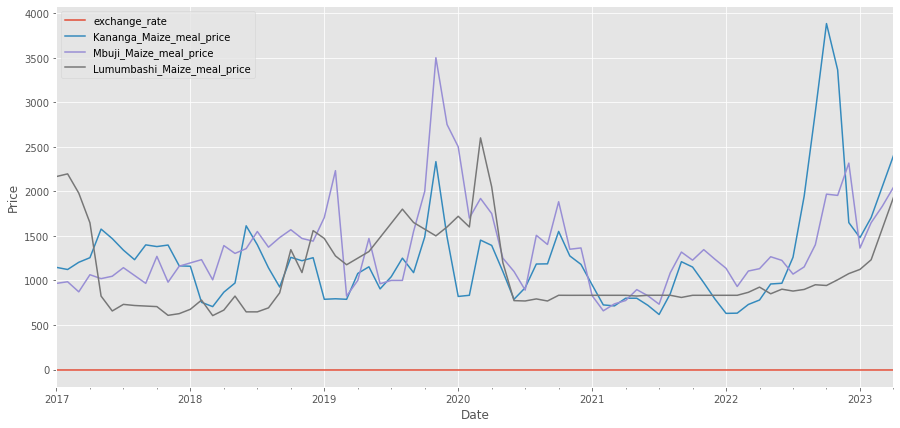

In [13]:
# Imputed Time series
df=maize_meal.drop('Unnamed: 0', axis = 1).copy()
df.index = pd.to_datetime(df['period_date'])
df.drop('period_date', inplace = True, axis = 1)
continuous_features = [feature for feature in df.columns if df[feature].dtypes != 'O']
plt.rcParams['figure.figsize']=(15,7)
style.use('ggplot')
df.plot(y = continuous_features)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [14]:
#adf_table = maize_meal.drop(['period_date', 'Unnamed: 0'], axis = 1)
adf_table = maize_meal.drop(['period_date', 'Unnamed: 0'], axis = 1)
adf_table.apply(adf_test, axis = 0)

,exchange_rate,Kananga_Maize_meal_price,Mbuji_Maize_meal_price,Lumumbashi_Maize_meal_price
Test Statistic,-1.411594,-2.661712,-3.536670,-2.676500
P-value,0.576706,0.080901,0.007094,0.078194
Lags Used,3.000000,2.000000,0.000000,0.000000
No of Observations,72.000000,73.000000,75.000000,75.000000
Critical Value (1%),-3.524624,-3.523284,-3.520713,-3.520713
Critical Value (5%),-2.902607,-2.902031,-2.900925,-2.900925
Critical Value (10%),-2.588679,-2.588371,-2.587781,-2.587781


In [15]:
def kpss_test(timeseries):
    print("Results of KPSS Test:")
    kpsstest = kpss(timeseries, regression="c", nlags="auto")
    kpss_output = pd.Series(
        kpsstest[0:3], index=["Test Statistic", "p-value", "Lags Used"]
    )
    for key, value in kpsstest[3].items():
        kpss_output["Critical Value (%s)" % key] = value
    print(kpss_output)

In [16]:
adf_table = maize_meal.drop(['period_date', 'Unnamed: 0'], axis = 1)
adf_table.apply(kpss_test, axis = 0)

Results of KPSS Test:
Test Statistic           1.287593
p-value                  0.010000
Lags Used                5.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.248938
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.141985
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64
Results of KPSS Test:
Test Statistic           0.12595
p-value                  0.10000
Lags Used                4.00000
Critical Value (10%)     0.34700
Critical Value (5%)  

exchange_rate                  None
Kananga_Maize_meal_price       None
Mbuji_Maize_meal_price         None
Lumumbashi_Maize_meal_price    None
dtype: object

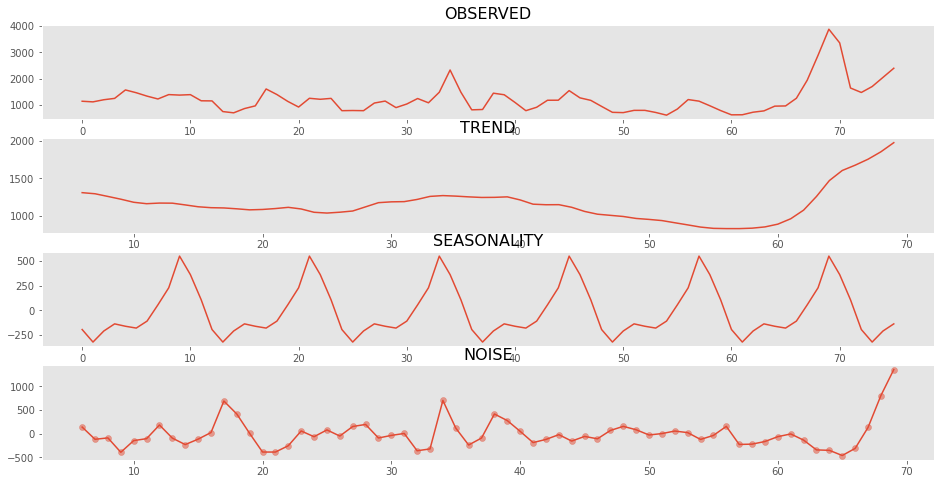

In [17]:
res = seasonal_decompose(maize_meal.drop('Unnamed: 0', axis = 1)['Kananga_Maize_meal_price'].values, period=12)
    
observed = res.observed
trend = res.trend
seasonal = res.seasonal
residual = res.resid
    
#plot the complete time series
fig, axs = plt.subplots(4, figsize=(16,8))
axs[0].set_title('OBSERVED', fontsize=16)
axs[0].plot(observed)
axs[0].grid()
    
#plot the trend of the time series
axs[1].set_title('TREND', fontsize=16)
axs[1].plot(trend)
axs[1].grid()
    
#plot the seasonality of the time series. Period=24 daily seasonality | Period=24*7 weekly seasonality.
axs[2].set_title('SEASONALITY', fontsize=16)
axs[2].plot(seasonal)
axs[2].grid()
    
#plot the noise of the time series
axs[3].set_title('NOISE', fontsize=16)
axs[3].plot(residual)
axs[3].scatter(y=residual, x=range(len(residual)), alpha=0.5)
axs[3].grid()
    
plt.show()

In [36]:
maize_meal

,period_date,Unnamed: 0,exchange_rate,Unnamed: 0,Kananga_Maize_meal_price,Unnamed: 0,Mbuji_Maize_meal_price,Unnamed: 0,Lumumbashi_Maize_meal_price
0,2017-01-31,1,0.000830,1,1146.50,1,966.750000,1,2166.000000
1,2017-02-28,2,0.000800,2,1122.50,2,985.000000,2,2196.000000
2,2017-03-31,3,0.000770,3,1203.50,3,871.833333,3,1980.000000
3,2017-04-30,4,0.000740,4,1255.00,4,1064.000000,4,1647.000000
4,2017-05-31,5,0.000720,5,1576.00,5,1020.000000,5,824.000000
...,...,...,...,...,...,...,...,...,...
71,2022-12-31,72,0.000498,72,1649.00,72,2316.750000,72,1076.500000
72,2023-01-31,73,0.000497,73,1479.75,73,1363.100000,73,1123.500000
73,2023-02-28,74,0.000493,74,1705.00,74,1647.750000,74,1231.500000
74,2023-03-31,75,0.000491,75,2052.50,75,1832.400656,75,1581.084798


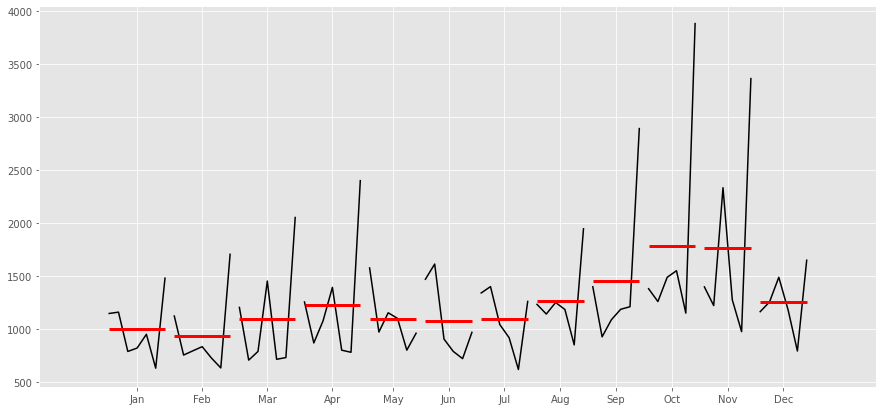

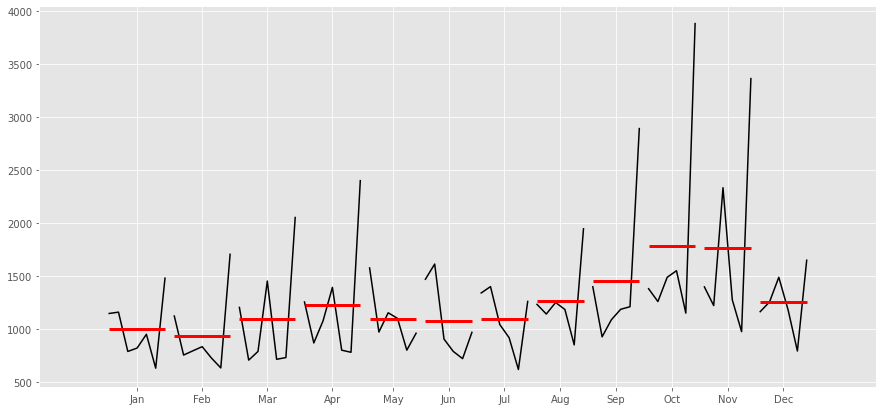

In [18]:
#y=y_maize[['date']].drop_duplicates()
#y=y[~y['date'].str.contains('2023-07')]
#maize_meal=pd.concat([maize_meal, y[['date']].rename(columns={'date':'date_'})], axis=1)
dff=maize_meal.drop('Unnamed: 0', axis=1)[['period_date', 'Kananga_Maize_meal_price']]
dff=dff.set_index('period_date')
dates=pd.to_datetime(dff.index.values)
dff.index = pd.DatetimeIndex(dates, freq='M')
month_plot(dff)

In [19]:
maize_meal=maize_meal.drop(['Unnamed: 0'], axis = 1)

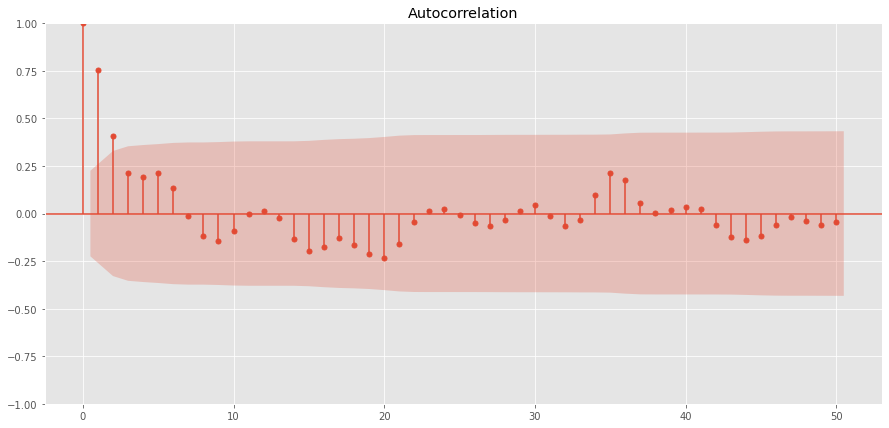

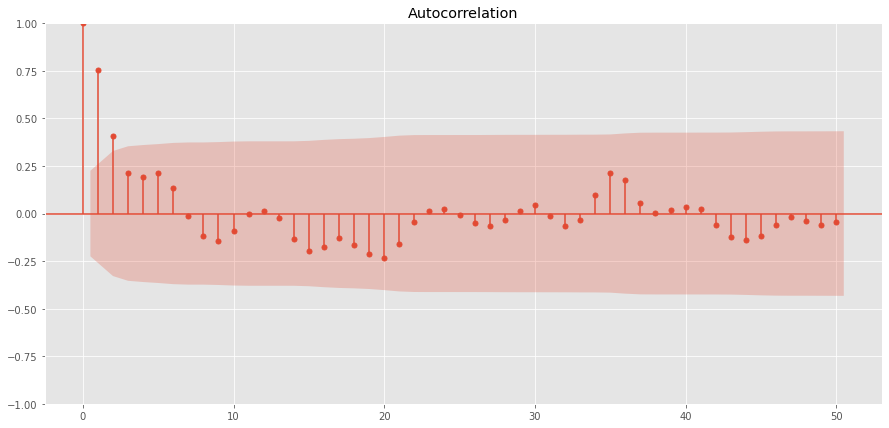

In [40]:
plot_acf(maize_meal['Kananga_Maize_meal_price'].values, lags=50)

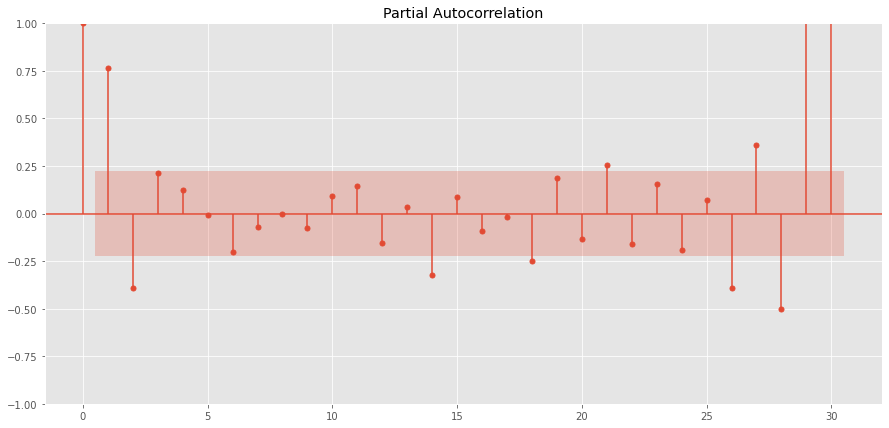

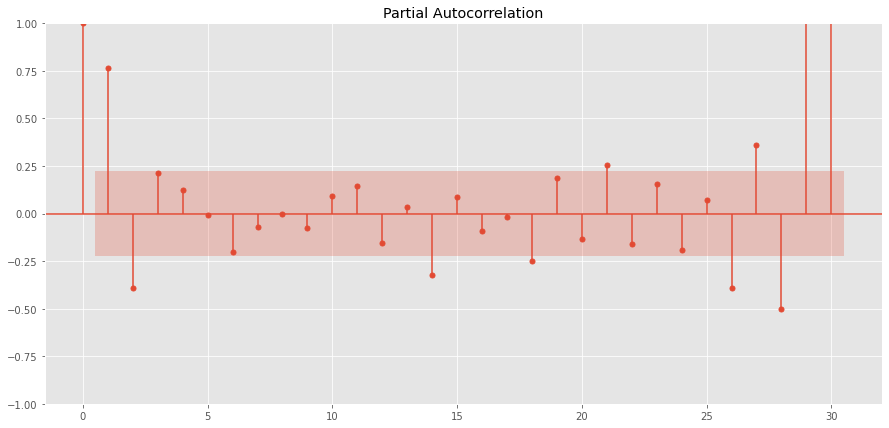

In [41]:
plot_pacf(maize_meal['Kananga_Maize_meal_price'].values, lags=30)

<Axes: >

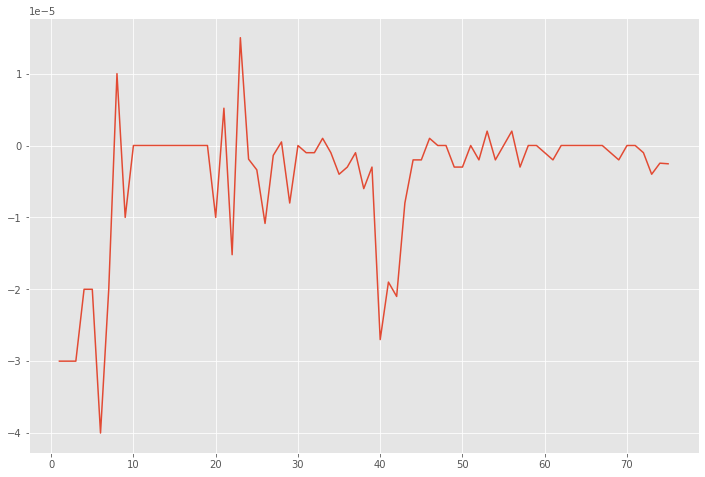

In [20]:
maize_meal['Lumumbashi_Maize_meal_price_diff'] = maize_meal['Lumumbashi_Maize_meal_price'] - maize_meal['Lumumbashi_Maize_meal_price'].shift(1)
maize_meal['exchange_rate_diff'] = maize_meal['exchange_rate'] - maize_meal['exchange_rate'].shift(1)
maize_meal['exchange_rate_diff'].dropna().plot(figsize=(12, 8))

In [21]:
maize_meal['exchange_rate_box'] = boxcox(maize_meal['exchange_rate'])[0]
maize_meal['Lumumbashi_Maize_meal_price_box'] = boxcox(maize_meal['Lumumbashi_Maize_meal_price'])[0]


In [22]:
maize_meal['Kananga_Maize_meal_price_diff'] = maize_meal['Kananga_Maize_meal_price'] - maize_meal['Kananga_Maize_meal_price'].shift(1)


In [23]:
maize_meal['Mbuji_Maize_meal_price_box'] = boxcox(maize_meal['Mbuji_Maize_meal_price'])[0]

<Axes: >

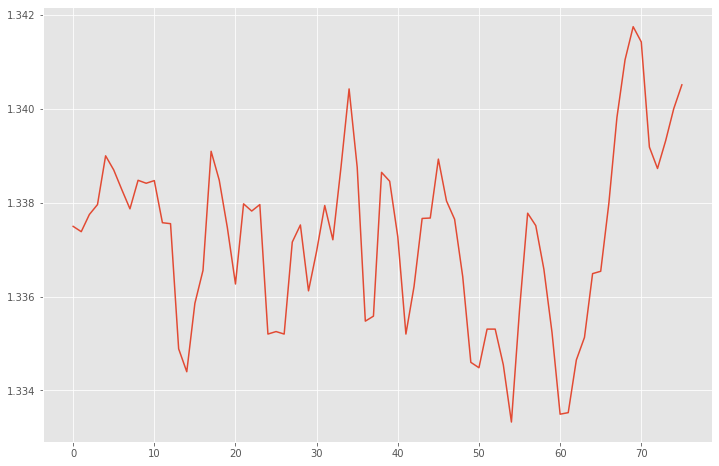

In [24]:
maize_meal['Kananga_Maize_meal_price_box'] = boxcox(maize_meal['Kananga_Maize_meal_price'])[0]
maize_meal['Kananga_Maize_meal_price_box'].plot(figsize=(12, 8))

In [25]:
adf_test(maize_meal['Kananga_Maize_meal_price_box'].dropna())

Test Statistic          -3.902474
P-value                  0.002017
Lags Used                1.000000
No of Observations      74.000000
Critical Value (1%)     -3.521980
Critical Value (5%)     -2.901470
Critical Value (10%)    -2.588072
dtype: float64

In [26]:
kpss_test(maize_meal['Kananga_Maize_meal_price_box'].dropna())

Results of KPSS Test:
Test Statistic           0.134002
p-value                  0.100000
Lags Used                4.000000
Critical Value (10%)     0.347000
Critical Value (5%)      0.463000
Critical Value (2.5%)    0.574000
Critical Value (1%)      0.739000
dtype: float64


In [48]:
from scipy import signal
def ccf_values(series1, series2):
    p = series1
    q = series2
    p = (p - np.mean(p)) / (np.std(p) * len(p))
    q = (q - np.mean(q)) / (np.std(q))  
    c = np.correlate(p, q, 'full')
    return c
    
ccf_ielts = ccf_values(maize_meal['Kananga_Maize_meal_price_box'].dropna(), maize_meal['exchange_rate_box'].dropna())
ccf_ielts

array([-0.00235236, -0.00349981, -0.00818293, -0.0146802 , -0.03115748,
       -0.04397971, -0.0522142 , -0.05600206, -0.0660953 , -0.07569528,
       -0.08583453, -0.08653553, -0.08726197, -0.06238883, -0.03455148,
       -0.02216018, -0.01780849, -0.03805822, -0.05031319, -0.05099422,
       -0.03973931, -0.04659484, -0.05219625, -0.05860817, -0.03643852,
       -0.0156622 ,  0.00439131,  0.00304122, -0.00176987,  0.00791639,
        0.01072334,  0.00428061,  0.00409573, -0.01042365, -0.03840697,
       -0.04909738, -0.02364296,  0.00075667, -0.00393139, -0.0074663 ,
        0.00127122,  0.03139034,  0.05162434,  0.05653698,  0.06079143,
        0.0512352 ,  0.04759842,  0.03887215,  0.03664054,  0.05069192,
        0.068638  ,  0.08323305,  0.10260389,  0.13275363,  0.17146609,
        0.18416457,  0.1756578 ,  0.17151432,  0.17335523,  0.18633443,
        0.20964275,  0.23296184,  0.24698913,  0.25426395,  0.2534565 ,
        0.25343109,  0.24736574,  0.22748993,  0.19854423,  0.16

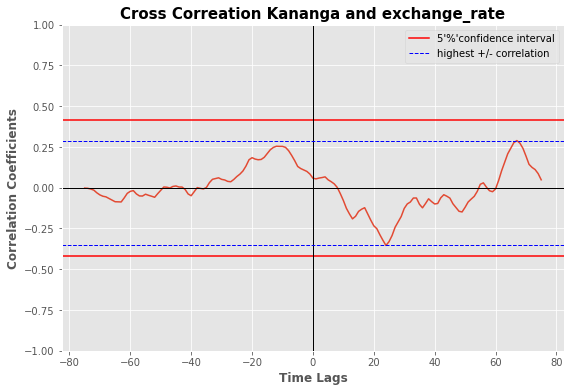

In [49]:
lags = signal.correlation_lags(len(maize_meal['Kananga_Maize_meal_price_box'].dropna()), len(maize_meal['exchange_rate_box'].dropna()))

def ccf_plot(lags, ccf):
    fig, ax =plt.subplots(figsize=(9, 6))
    ax.plot(lags, ccf)
    ax.axhline(-2/np.sqrt(23), color='red', label="5'%'confidence interval")
    ax.axhline(2/np.sqrt(23), color='red')
    ax.axvline(x = 0, color = 'black', lw = 1)
    ax.axhline(y = 0, color = 'black', lw = 1)
    ax.axhline(y = np.max(ccf), color = 'blue', lw = 1, 
    linestyle='--', label = 'highest +/- correlation')
    ax.axhline(y = np.min(ccf), color = 'blue', lw = 1, 
    linestyle='--')
    ax.set(ylim = [-1, 1])
    ax.set_title('Cross Correation Kananga and exchange_rate', weight='bold', fontsize = 15)
    ax.set_ylabel('Correlation Coefficients', weight='bold', 
    fontsize = 12)
    ax.set_xlabel('Time Lags', weight='bold', fontsize = 12)
    plt.legend()
    
ccf_plot(lags, ccf_ielts)

In [27]:
#!pip install pmdarima --quiet
import pmdarima as pm
from sklearn.model_selection import TimeSeriesSplit
from scipy.stats import normaltest

In [28]:
maize_meal['period_date']=pd.to_datetime(maize_meal['period_date'])
dfm=maize_meal.set_index('period_date')

#maize_meal['date_']=pd.to_datetime(maize_meal['date_'])
#dfm=maize_meal.set_index('date_')

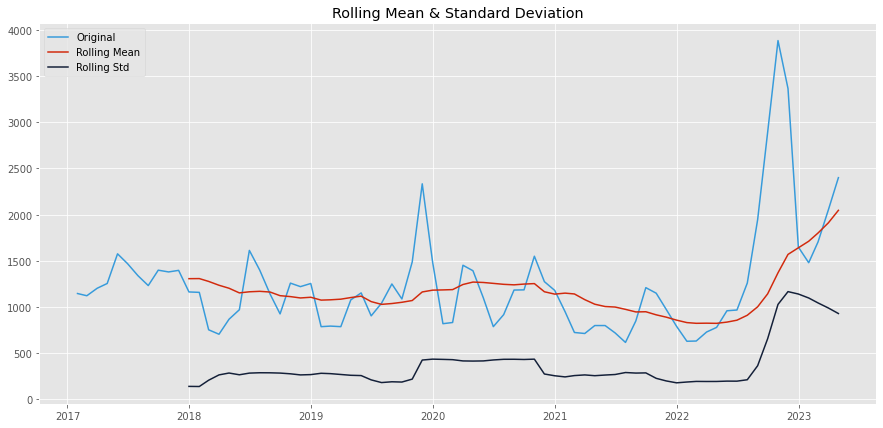

In [29]:
#Determine rolling statistics
dfm["rolling_avg"] = dfm["Kananga_Maize_meal_price"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
dfm["rolling_std"] = dfm["Kananga_Maize_meal_price"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(dfm["Kananga_Maize_meal_price"], color='#379BDB', label='Original')
plt.plot(dfm["rolling_avg"], color='#D22A0D', label='Rolling Mean')
plt.plot(dfm["rolling_std"], color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=True)

In [30]:
def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def HWGrid(train, test, seasonal_periods):
    """
    Author: Sandeep Pawar twitter: @PawarBI
    Functions returns a dataframe with parameters of the Holt-Winter's method and corresponding train & test evaluation scores. 
    It also does a quick check of the residuals using Ljung-Box test and Shapiro test for normality. 
    Residuals must be uncorrelated. 
    
    train: (pandas series)
        -  Training data
        
    test: (pandas series)
        -  Test data
    
    Seasonal_periods: int
        - No of seasonas in the time period. e.g. 4 for Quarterly, 12 for Monthly, 52 for Weekly data
        
    """
    import itertools
    from statsmodels.tools.eval_measures import rmse


    trend      = ['add','mul']
    seasonal   = ['add','mul']
    damped     = [False, True]
    use_boxcox = [False, True, 'log']

    params = itertools.product(trend,seasonal,damped,use_boxcox)

    result_df = pd.DataFrame(columns=['Trend', 'Seasonal', 'Damped', 'BoxCox','AICc Train',  
                                      '%MAPE_Train', 'RMSE_Train', '%MAPE_Test', 
                                      'RMSE_Test', "Resid_LJ", "Resid_Norm","Resid_mean" ])
    
    
    for trend,seasonal,damped,use_boxcox in params:
    
            model = ExponentialSmoothing(train, 
                                     trend=trend,
                                     damped=damped,
                                     seasonal=seasonal,
                                     seasonal_periods=seasonal_periods).fit(use_boxcox=use_boxcox)
    
    
            
            mape1=MAPE(train,model.fittedvalues) 
            rmse1=rmse(train,model.fittedvalues)

            mape2=MAPE(test,model.forecast(len(test))) 
            rmse2=rmse(test,model.forecast(len(test)))

            aicc1 = model.aicc.round(1)

               
    
            lj_p_val = np.mean(ljung(x=model.resid, lags=10)[1])
            norm_p_val =  jb(model.resid)[1]#shapiro(model.resid)[1]
    
            lj = "Uncorrelated" if lj_p_val > 0.05 else "Correlated"
            norm = "Normal" if norm_p_val > 0.05 else "Non-Normal"
            
    
            result_df = result_df.append({'Trend':trend       ,
                              'Seasonal': seasonal            ,
                              'Damped':damped                 ,
                              'BoxCox':use_boxcox             ,
                              '%MAPE_Train':np.round(mape1,2) ,
                              'RMSE_Train':np.round(rmse1,1)  ,
                              'AICc Train':aicc1              ,
                              '%MAPE_Test':np.round(mape2,2)  ,
                              'RMSE_Test':np.round(rmse2,1)   ,
                              'Resid_LJ' :lj                  ,
                              'Resid_Norm':norm               ,
                              'Resid_mean':np.round(model.resid.mean(),1)} , ignore_index=True, sort=False)
    
    
    return result_df.sort_values(by=["RMSE_Test", "%MAPE_Test","RMSE_Train","%MAPE_Train"]).style.format({"%MAPE_Train": "{:20,.2f}%", "%MAPE_Test": "{:20,.2f}%"}).highlight_min(color='lightgreen')

In [31]:
def hw_cv(series, seasonal_periods, initial_train_window, test_window):
    
    from statsmodels.tools.eval_measures import rmse
    import itertools
    import warnings
    warnings.filterwarnings("ignore")
    
    """
     Author: Sandeep Pawar
     Date: 4/15/2020
     Ver: 1.0
     
     Returns Rolling and Expanding cross-validation scores (avg rmse), along with model paramters
     for Triple Exponential Smoothing method. Expanding expands the training set each time by adding one observation, 
     while rolling slides the training and test by one observation each time. 
     
     Output shows parameters used and Rolling & Expanding cv scores. Output is in below order:
          1. Trend 2. Seasonal 3. Damped 4. use_boxcox 5. Rolling cv 6. Expanding cv 
     
     Requirements: Pandas, Numpy, Statsmodels, itertools, rmse 
     
     series: Pandas Series
             Time series 
     
     seasonal_periods: int
             No of seasonal periods in a full cycle (e.g. 4 in quarter, 12 in monthly, 52 in weekly data)
             
     initial_train_window: int
             Minimum training set length. Recommended to use minimum 2 * seasonal_periods
     
     test_window: int
             Test set length. Recommended to use equal to forecast horizon
             
     e.g. hw_cv(ts["Sales"], 4, 12, 6 )
          Output: add add False False    R: 41.3   ,E: 39.9

          
     Note: This function can take anywhere from 5-15 min to run full output        
    
     
    
    
    """
    
    
    def expanding_tscv(series,trend,seasonal,seasonal_periods,damped,boxcox,initial_train_window, test_window):
        i =  0
        x = initial_train_window
        t = test_window
        errors_roll=[]

        while (i+x+t) <len(series):
            train_ts=series[:(i+x)].values
            test_ts= series[(i+x):(i+x+t)].values
            model_roll = ExponentialSmoothing(train_ts,
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=seasonal_periods,
                                         damped=damped,
                                         use_boxcox=boxcox).fit()

            fcast = model_roll.forecast(t)

            error_roll = rmse(test_ts, fcast)

            errors_roll.append(error_roll)

            i=i+1


        return np.mean(errors_roll).round(1)

    def rolling_tscv(series,trend,seasonal,seasonal_periods,damped,boxcox,initial_train_window, test_window):
        i =  0
        x = initial_train_window
        t = test_window
        errors_roll=[]

        while (i+x+t) <len(series):
            train_ts=series[(i):(i+x)].values
            test_ts= series[(i+x):(i+x+t)].values
            model_roll = ExponentialSmoothing(train_ts,
                                         trend=trend,
                                         seasonal=seasonal,
                                         seasonal_periods=seasonal_periods,
                                         damped=damped,
                                         use_boxcox=boxcox).fit()

            fcast = model_roll.forecast(t)

            error_roll = rmse(test_ts, fcast)

            errors_roll.append(error_roll)

            i=i+1

   
        return np.mean(errors_roll).round(1)
   
    trend      = ['add','mul']
    seasonal   = ['add','mul']
    damped     = [False, True]
    #use_boxcoxx =[False, True, 'log']
    use_boxcoxx =[False, True]

    params = itertools.product(trend,seasonal,damped,use_boxcoxx)

    for trend,seasonal,damped,use_boxcoxx in params:
        r=rolling_tscv(X["Kananga_Maize_meal_price"], trend, seasonal, 12, damped, use_boxcoxx, 60,6)
        e=expanding_tscv(X["Kananga_Maize_meal_price"], trend, seasonal, 12, damped, use_boxcoxx, 60,6)
        result = print(trend, seasonal, damped, use_boxcoxx,"   R:", r,"  ,E:", e)
          
    return result

In [32]:
def residcheck(residuals, lags):
    """
    Function to check if the residuals are white noise. Ideally the residuals should be uncorrelated, zero mean, 
    onstant variance and normally distributed. First two are must, while last two are good to have. 
    If the first two are not met, we have not fully captured the information from the data for prediction. 
    Consider different model and/or add exogenous variable. 
    
    If Ljung Box test shows p> 0.05, the residuals as a group are white noise. Some lags might still be significant. 
    
    Lags should be min(2*seasonal_period, T/5)
    
    plots from: https://tomaugspurger.github.io/modern-7-timeseries.html
    
    """
    resid_mean = np.mean(residuals)
    lj_p_val = np.mean(ljung(x=residuals, lags=lags)['lb_pvalue'])
    norm_p_val =  jb(residuals)[1]
    adfuller_p = adfuller(residuals)[1]
    
    
    
    fig = plt.figure(figsize=(10,8))
    layout = (2, 2)
    ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2);
    acf_ax = plt.subplot2grid(layout, (1, 0));
    kde_ax = plt.subplot2grid(layout, (1, 1));

    residuals.plot(ax=ts_ax)
    plot_acf(residuals, lags=lags, ax=acf_ax);
    sns.kdeplot(residuals);
    #[ax.set_xlim(1.5) for ax in [acf_ax, kde_ax]]
    sns.despine()
    plt.tight_layout();
    
    print("** Mean of the residuals: ", np.around(resid_mean,2))
    
    print("\n** Ljung Box Test, p-value:", np.around(lj_p_val,3), "(>0.05, Uncorrelated)" if (lj_p_val > 0.05) else "(<0.05, Correlated)")
    
    print("\n** Jarque Bera Normality Test, p_value:", np.around(norm_p_val,3), "(>0.05, Normal)" if (norm_p_val>0.05) else "(<0.05, Not-normal)")
    
    print("\n** AD Fuller, p_value:", np.around(adfuller_p,3), "(>0.05, Non-stationary)" if (adfuller_p > 0.05) else "(<0.05, Stationary)")
    
    
    
    return ts_ax, acf_ax, kde_ax

def pysnaive(train_series,seasonal_periods,forecast_horizon):
    '''
    Python implementation of Seasonal Naive Forecast. 
    This should work similar to https://otexts.com/fpp2/simple-methods.html
    Returns two arrays
     > fitted: Values fitted to the training dataset
     > fcast: seasonal naive forecast
    
    Author: Sandeep Pawar
    
    Date: Apr 9, 2020
    
    Ver: 1.0
    
    train_series: Pandas Series
        Training Series to be used for forecasting. This should be a valid Pandas Series. 
        Length of the Training set should be greater than or equal to number of seasonal periods
        
    Seasonal_periods: int
        No of seasonal periods
        Yearly=1
        Quarterly=4
        Monthly=12
        Weekly=52
        

    Forecast_horizon: int
        Number of values to forecast into the future
    
    e.g. 
    fitted_values = pysnaive(train,12,12)[0]
    fcast_values = pysnaive(train,12,12)[1]
    '''
    
    if len(train_series)>= seasonal_periods: #checking if there are enough observations in the training data
        
        last_season=train_series.iloc[-seasonal_periods:]
        
        reps=np.int(np.ceil(forecast_horizon/seasonal_periods))
        
        fcarray=np.tile(last_season,reps)
        
        fcast=pd.Series(fcarray[:forecast_horizon])
        
        fitted = train_series.shift(seasonal_periods)
        
    else:
        fcast=print("Length of the trainining set must be greater than number of seasonal periods") 
    
    return fitted, fcast

In [33]:
def accuracy(A,F):
    
    accuracy_df=pd.DataFrame()
    
    rms_error = np.round(rmse(A, F),1)
    
    map_error = np.round(np.mean(np.abs((np.array(A) - np.array(F)) / np.array(A))) * 100,1)

    smap_error=100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
           
    accuracy_df=accuracy_df.append({"RMSE":rms_error, "%MAPE": map_error, "%SMAPE": smap_error}, ignore_index=True)
    
    return accuracy_df

In [34]:
class expanding_window(object):
    '''	
    Parameters 
    ----------
    
    Note that if you define a horizon that is too far, then subsequently the split will ignore horizon length 
    such that there is validation data left. This similar to Prof Rob hyndman's TsCv 
    
    
    initial: int
        initial train length 
    horizon: int 
        forecast horizon (forecast length). Default = 1
    period: int 
        length of train data to add each iteration 
    '''
    

    def __init__(self,initial= 1,horizon = 1,period = 1):
        self.initial = initial
        self.horizon = horizon 
        self.period = period 


    def split(self,data):
        '''
        Parameters 
        ----------
        
        Data: Training data 
        
        Returns 
        -------
        train_index ,test_index: 
            index for train and valid set similar to sklearn model selection
        '''
        self.data = data
        self.counter = 0 # for us to iterate and track later 


        data_length = data.shape[0] # rows 
        data_index = list(np.arange(data_length))
         
        output_train = []
        output_test = []
        # append initial 
        output_train.append(list(np.arange(self.initial)))
        progress = [x for x in data_index if x not in list(np.arange(self.initial)) ] # indexes left to append to train 
        output_test.append([x for x in data_index if x not in output_train[self.counter]][:self.horizon] )
        # clip initial indexes from progress since that is what we are left 
         
        while len(progress) != 0:
            temp = progress[:self.period]
            to_add = output_train[self.counter] + temp
            # update the train index 
            output_train.append(to_add)
            # increment counter 
            self.counter +=1 
            # then we update the test index 
            
            to_add_test = [x for x in data_index if x not in output_train[self.counter] ][:self.horizon]
            output_test.append(to_add_test)

            # update progress 
            progress = [x for x in data_index if x not in output_train[self.counter]]	
            
        # clip the last element of output_train and output_test
        output_train = output_train[:-1]
        output_test = output_test[:-1]
        
        # mimic sklearn output 
        index_output = [(train,test) for train,test in zip(output_train,output_test)]
        
        return index_output

In [35]:
dfm

,exchange_rate,Kananga_Maize_meal_price,Mbuji_Maize_meal_price,Lumumbashi_Maize_meal_price,Lumumbashi_Maize_meal_price_diff,exchange_rate_diff,exchange_rate_box,Lumumbashi_Maize_meal_price_box,Kananga_Maize_meal_price_diff,Mbuji_Maize_meal_price_box,Kananga_Maize_meal_price_box,rolling_avg,rolling_std
period_date,,,,,,,,,,,,,
2017-01-31,0.000830,1146.50,966.750000,2166.000000,NaN,NaN,-2.314619e+06,0.880880,NaN,1.682866,1.337495,NaN,NaN
2017-02-28,0.000800,1122.50,985.000000,2196.000000,30.000000,-3.000000e-05,-2.507604e+06,0.880882,-24.00,1.683203,1.337382,NaN,NaN
2017-03-31,0.000770,1203.50,871.833333,1980.000000,-216.000000,-3.000000e-05,-2.725007e+06,0.880864,81.00,1.680935,1.337748,NaN,NaN
2017-04-30,0.000740,1255.00,1064.000000,1647.000000,-333.000000,-3.000000e-05,-2.971061e+06,0.880827,51.50,1.684555,1.337959,NaN,NaN
2017-05-31,0.000720,1576.00,1020.000000,824.000000,-823.000000,-2.000000e-05,-3.153525e+06,0.880592,321.00,1.683822,1.338999,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31,0.000498,1649.00,2316.750000,1076.500000,69.300000,0.000000e+00,-7.031898e+06,0.880705,-1714.40,1.695273,1.339185,1641.120833,1141.086183
2023-01-31,0.000497,1479.75,1363.100000,1123.500000,47.000000,-1.000000e-06,-7.062713e+06,0.880720,-169.25,1.688507,1.338728,1711.933333,1098.195078
2023-02-28,0.000493,1705.00,1647.750000,1231.500000,108.000000,-4.000000e-06,-7.187962e+06,0.880750,225.25,1.691170,1.339319,1801.308333,1044.699773


In [36]:
X=dfm.head(72)[['Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price']]
#X=dfm.head(96)[['Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price']]
Y=dfm.tail(4)[['Kananga_Maize_meal_price']]

#X=dfm.head(96)[['Bamenda.price']]
#Y=dfm.tail(6)[['Bamenda.price']]

#X__=dfm.head(96)[['Bamenda.price', 'Bamenda.price_price_box', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)
#Y__=dfm.tail(6)[['Bamenda.price', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)

#dfm_=dfm.loc[dfm.index[49]:]
#X__n=dfm_.head(47)[['Bamenda.price', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)
#Y__n=dfm_.tail(6)[['Bamenda.price', 'exchange_rate', 'inflation_rate', 'Fundong.price', 'Kumbo.price', 'Ndop.price', 'Nkambe.price', 'Wum.price']].reset_index().drop('date_', axis=1)
X__n=dfm.head(72)[['Kananga_Maize_meal_price', 'Kananga_Maize_meal_price_box', 'exchange_rate_box', 'Lumumbashi_Maize_meal_price_box', 'Mbuji_Maize_meal_price_box']]
Y__n=dfm.tail(4)[['Kananga_Maize_meal_price', 'exchange_rate_box', 'Lumumbashi_Maize_meal_price_box', 'Mbuji_Maize_meal_price_box']]

#X__na=dfm.head(72)[['Bamenda.price', 'Bamenda.price_price_box', 'exchange_rate_box', 'inflation_rate_box', 'Fundong.price_box', 'Kumbo.price_box', 'Ndop.price_box', 'Nkambe.price_box', 'Wum.price_box']]
#Y__na=dfm.tail(4)[['Bamenda.price', 'exchange_rate_box', 'inflation_rate_box', 'Fundong.price_box', 'Kumbo.price_box', 'Ndop.price_box', 'Nkambe.price_box', 'Wum.price_box']]

In [37]:
#X['Kananga_Maize_meal_price_box']
#k2, p=normaltest(X['Kananga_Maize_meal_price_box'].values)
k2, p=normaltest(X['Kananga_Maize_meal_price'].values)
p

2.1049790057167058e-14

In [38]:
#Before I create the model, I am going to create a dataframe to store all out-of=sample forecasts and the test set
#predictions = Y[['Bamenda.price_price_box']].copy()
predictions = Y[['Kananga_Maize_meal_price']].copy()

#### Seasonal Naive

In [39]:
#Fitted values
py_snaive_fit = pysnaive(X["Kananga_Maize_meal_price"], 
                     seasonal_periods=12,
                     forecast_horizon=4)[0]

#forecast
py_snaive = pysnaive(X["Kananga_Maize_meal_price"], 
                     seasonal_periods=12,
                     forecast_horizon=4)[1]

#Residuals
py_snaive_resid = (X["Kananga_Maize_meal_price"] - py_snaive_fit).dropna()




predictions["py_snaive"] = py_snaive.values 

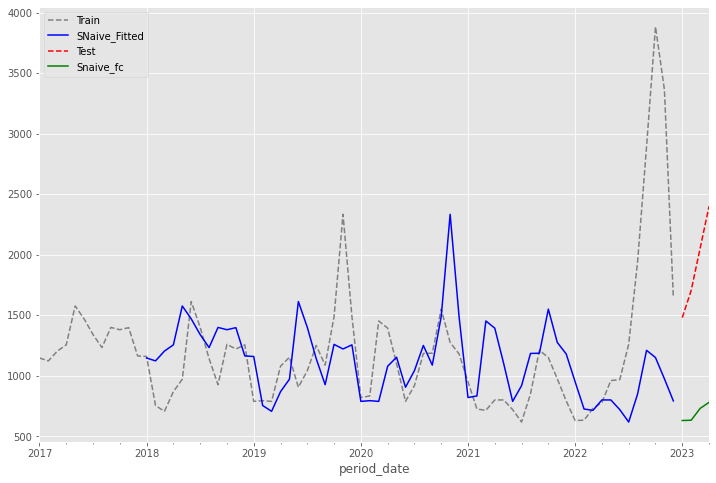

In [40]:
pd.plotting.register_matplotlib_converters()
X["Kananga_Maize_meal_price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")#, style="--", color="gray", legend=True, label="Train")
py_snaive_fit.plot(color="b", legend=True, label="SNaive_Fitted")
predictions["Kananga_Maize_meal_price"].plot(style="--",color="r", legend=True, label="Test")
predictions["py_snaive"].plot(color="green", legend=True, label="Snaive_fc");

In [41]:
#Training score
accuracy(X["Kananga_Maize_meal_price"].iloc[-len(py_snaive_fit.dropna()):], py_snaive_fit.dropna())

,RMSE,%MAPE,%SMAPE
0,650.9,30.2,29.642508


In [42]:
#Test score
accuracy(predictions["Kananga_Maize_meal_price"], predictions["py_snaive"])

,RMSE,%MAPE,%SMAPE
0,1249.6,63.1,92.316117


** Mean of the residuals:  66.81

** Ljung Box Test, p-value: 0.0 (<0.05, Correlated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.074 (>0.05, Non-stationary)


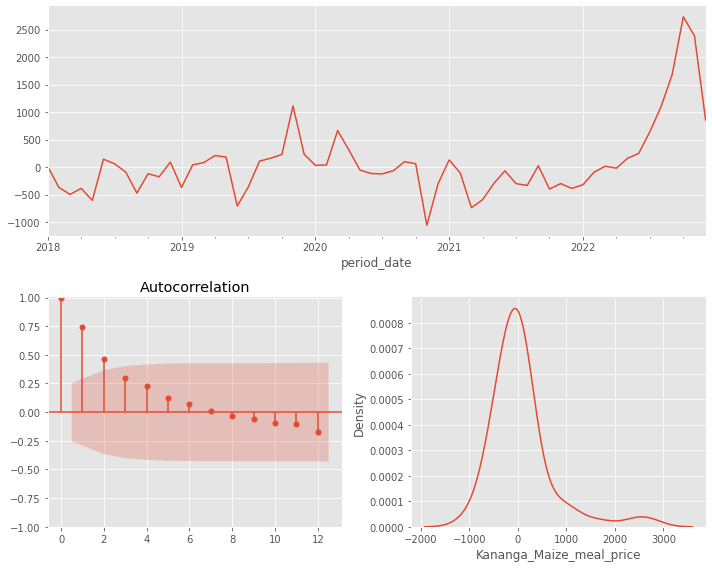

In [43]:
residcheck(py_snaive_resid.dropna(),12);

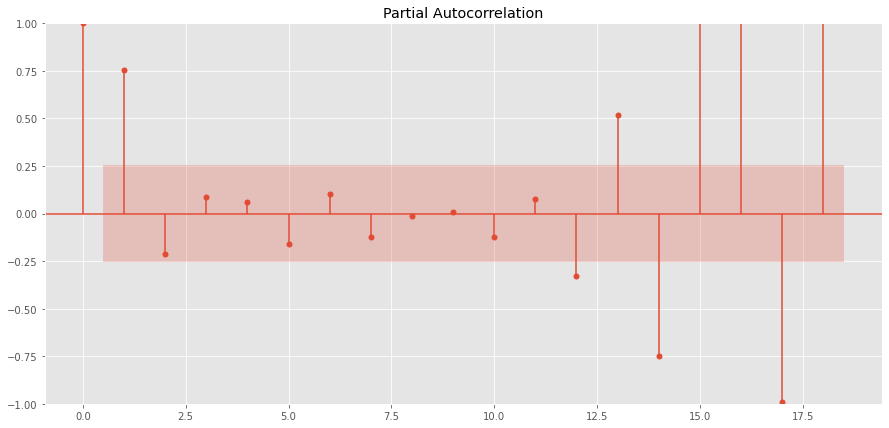

In [75]:
plot_pacf(py_snaive_resid);

#### Triple Exponential Smoothing (Holt-Winter's Method)

In [76]:
hw_cv(X["Kananga_Maize_meal_price"], seasonal_periods=12, initial_train_window=60, test_window=4)

add add False False    R: 892.1   ,E: 893.9
add add False True    R: 887.0   ,E: 886.8
add add True False    R: 867.5   ,E: 876.3
add add True True    R: 873.3   ,E: 870.7
add mul False False    R: 898.2   ,E: 902.5
add mul False True    R: 888.2   ,E: 888.2
add mul True False    R: 882.2   ,E: 889.2
add mul True True    R: 879.5   ,E: 867.9
mul add False False    R: 871.3   ,E: 872.0
mul add False True    R: 886.3   ,E: 885.7
mul add True False    R: 829.7   ,E: 836.8
mul add True True    R: nan   ,E: 689.8
mul mul False False    R: 873.0   ,E: 873.7
mul mul False True    R: 887.8   ,E: 887.2
mul mul True False    R: 831.8   ,E: 837.1
mul mul True True    R: 575.8   ,E: 715.0


In [44]:
hw_model = ExponentialSmoothing(X["Kananga_Maize_meal_price"],
                          trend    ="mul",
                          seasonal = "add", 
                          seasonal_periods=12, 
                          damped=True,
                          use_boxcox=False).fit()

hw_fitted = hw_model.fittedvalues

hw_resid = hw_model.resid

#Adding the mean of the residuals to correct the bias.
py_hw = hw_model.forecast(len(Y['Kananga_Maize_meal_price'])) + np.mean(hw_resid)

predictions["py_hw"] = py_hw

#Holt-Winter Parameters
hw_model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995226,True
smoothing_trend,beta,0.000096,True
smoothing_seasonal,gamma,0.000091,True
initial_level,l.0,1318.357414,True
initial_trend,b.0,0.990102,True
damping_trend,phi,0.981419,True
initial_seasons.0,s.0,-187.670582,True
initial_seasons.1,s.1,-281.579901,True
initial_seasons.2,s.2,-170.749418,True
initial_seasons.3,s.3,-121.216381,True


** Mean of the residuals:  11.34

** Ljung Box Test, p-value: 0.107 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


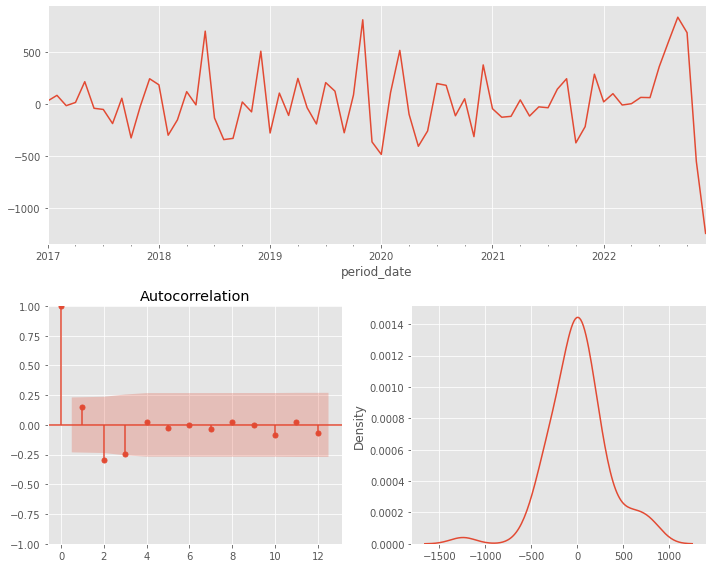

In [45]:
residcheck(hw_resid, 12);

In [46]:
predictions

,Kananga_Maize_meal_price,py_snaive,py_hw
period_date,,,
2023-01-31,1479.75,630.0,1491.831477
2023-02-28,1705.00,632.5,1401.856578
2023-03-31,2052.50,730.0,1516.520783
2023-04-30,2400.00,780.0,1569.831902


In [47]:
accuracy(predictions["Kananga_Maize_meal_price"],predictions["py_hw"] )

,RMSE,%MAPE,%SMAPE
0,516.8,19.8,23.046635


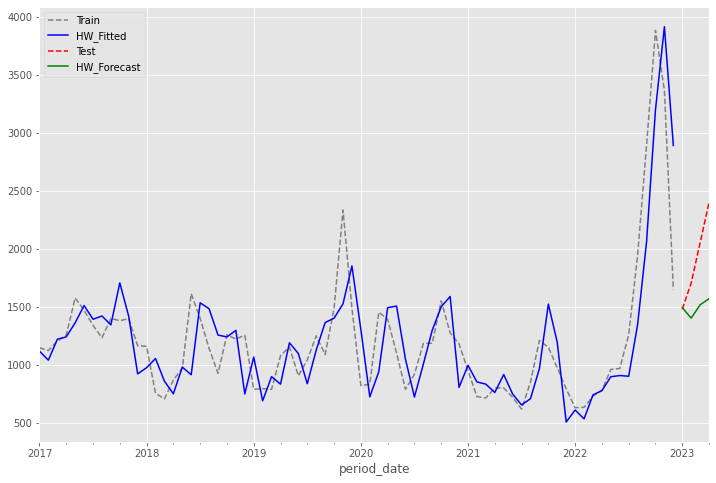

In [48]:
#Plotting

X["Kananga_Maize_meal_price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
hw_fitted.plot(color="b", legend=True, label="HW_Fitted")
predictions["Kananga_Maize_meal_price"].plot(style="--",color="r", legend=True, label="Test")
predictions["py_hw"].plot(color="green", legend=True, label="HW_Forecast");

In [49]:
predictions_=pd.DataFrame()

In [50]:
hw_model = ExponentialSmoothing(dfm["Kananga_Maize_meal_price"],
                          trend    ="mul",
                          seasonal = "add", 
                          seasonal_periods=12, 
                          damped=True,
                          use_boxcox=False).fit()

hw_fitted_ = hw_model.fittedvalues

hw_resid = hw_model.resid

#Adding the mean of the residuals to correct the bias.
py_hw_ = hw_model.forecast(6) + np.mean(hw_resid)

predictions_["py_hw"] = py_hw_

#Holt-Winter Parameters
hw_model.params_formatted

,name,param,optimized
smoothing_level,alpha,0.995223,True
smoothing_trend,beta,0.000096,True
smoothing_seasonal,gamma,0.000091,True
initial_level,l.0,1317.478938,True
initial_trend,b.0,1.002494,True
damping_trend,phi,0.981523,True
initial_seasons.0,s.0,-210.181139,True
initial_seasons.1,s.1,-265.124975,True
initial_seasons.2,s.2,-172.837837,True
initial_seasons.3,s.3,-93.466792,True


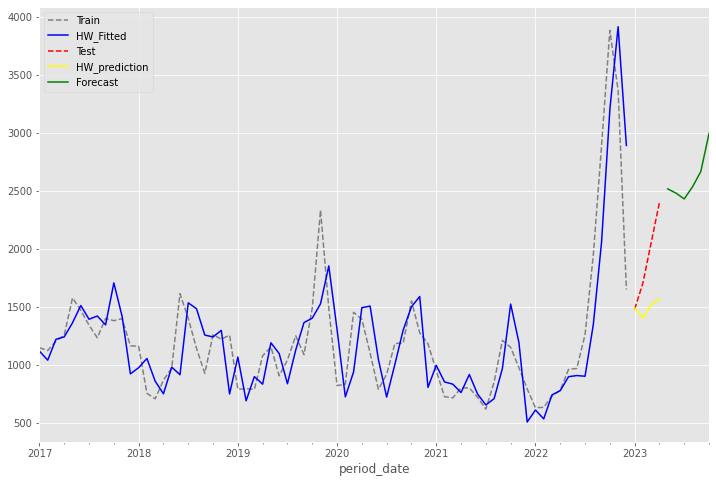

In [51]:
#Plotting

X["Kananga_Maize_meal_price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
hw_fitted.plot(color="b", legend=True, label="HW_Fitted")
predictions["Kananga_Maize_meal_price"].plot(style="--",color="r", legend=True, label="Test")
predictions["py_hw"].plot(color="yellow", legend=True, label="HW_prediction");
predictions_["py_hw"].plot(color="green", legend=True, label="Forecast");

In [52]:
predictions_

,py_hw
2023-05-31,2516.183664
2023-06-30,2479.636499
2023-07-31,2429.713120
2023-08-31,2533.873457
2023-09-30,2665.308368
2023-10-31,2994.576528


In [53]:
X.index.freq='M'

In [54]:
#https://www.statsmodels.org/stable/statespace.html#
ets_LAdA=sm.tsa.statespace.ExponentialSmoothing(X[['Kananga_Maize_meal_price']],
                                           trend=True, 
                                           initialization_method= 'concentrated', 
                                           seasonal=12, 
                                           damped_trend=True).fit()

fc_LAdA = ets_LAdA.forecast(4) #inverting the Log

predictions["LAdA"]=fc_LAdA

In [ ]:
X

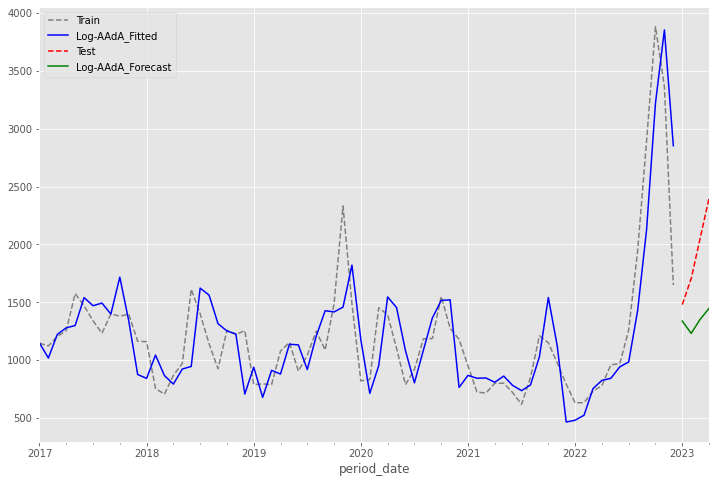

In [56]:
#Plotting

X["Kananga_Maize_meal_price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
ets_LAdA.fittedvalues.plot(color="b", legend=True, label="Log-AAdA_Fitted")
predictions["Kananga_Maize_meal_price"].plot(style="--",color="r", legend=True, label="Test")
predictions["LAdA"].plot(color="green", legend=True, label="Log-AAdA_Forecast");

** Mean of the residuals:  7.21

** Ljung Box Test, p-value: 0.086 (>0.05, Uncorrelated)

** Jarque Bera Normality Test, p_value: 0.0 (<0.05, Not-normal)

** AD Fuller, p_value: 0.0 (<0.05, Stationary)


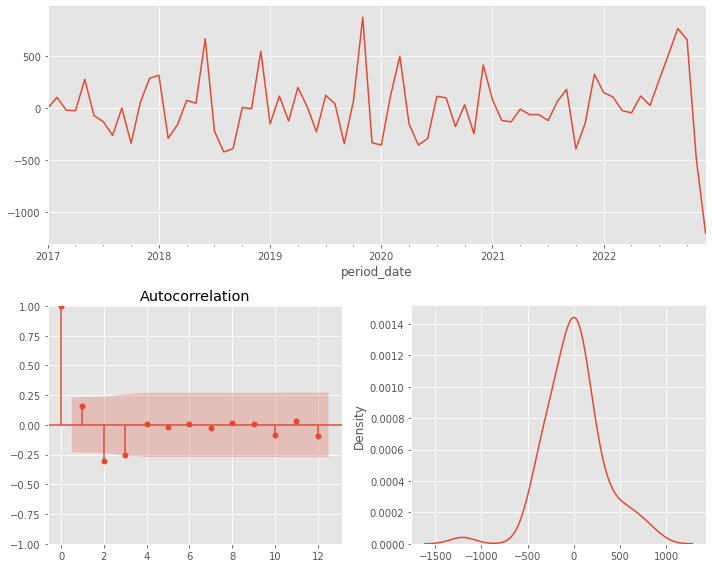

In [57]:
residcheck(ets_LAdA.resid,12);

In [58]:
accuracy(predictions["Kananga_Maize_meal_price"],predictions["LAdA"])

,RMSE,%MAPE,%SMAPE
0,640.8,27.8,33.254961


In [59]:
tscv = expanding_window(initial = 60, horizon = 4,period = 1)

tscv_ = TimeSeriesSplit(gap=1, max_train_size=60, test_size=4)

params = {
    'max_depth':(5,6,7,-1),
    'reg_lambda':(1e-3, 1e-2, 1e-1, 1, 10),
    'reg_alpha':(1e-3, 1e-2, 1e-1, 1, 10)
}

lgb_reg = lgb.LGBMRegressor(random_state=9, n_jobs=-1)

In [60]:
from scipy.stats import norm
def back(x, lam, sig):

    if lam==0:
        return np.exp(x)*(1 + 0.5 * sig**2)
    else:
        res=np.power(lam*x + 1., 1/lam)
        res*=(1 + 0.5 * sig**2 * (1 - lam) / (lam*x + 1.)**2)
    return res

In [ ]:
X__n

In [61]:
X__n['Kananga_Maize_meal_price_box_train'], lam = boxcox(X__n['Kananga_Maize_meal_price'])

In [62]:
%%time
gridcv = GridSearchCV(estimator=lgb_reg, param_grid=params,\
                      scoring="neg_mean_absolute_error", n_jobs=-1, cv=tscv_)
gridcv = gridcv.fit(X__n.drop(['Kananga_Maize_meal_price', 'Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price_box_train'], axis=1), X__n[['Kananga_Maize_meal_price_box']])

CPU times: total: 969 ms
Wall time: 22.5 s


In [63]:
best_params = gridcv.best_params_
best_score = round(gridcv.best_score_,4)
print(best_score)

-0.0021


In [64]:
print(best_params)

{'max_depth': 5, 'reg_alpha': 0.001, 'reg_lambda': 0.1}


In [65]:
%%time
lgb_reg = lgb.LGBMRegressor(random_state=9, n_jobs=-1,\
                            **best_params)
lgb_reg = lgb_reg.fit(X__n.drop(['Kananga_Maize_meal_price', 'Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price_box_train'], axis=1), X__n[['Kananga_Maize_meal_price_box_train']])

y_pred = lgb_reg.predict(Y__n.drop('Kananga_Maize_meal_price', axis=1))

CPU times: total: 31.2 ms
Wall time: 40.7 ms


In [66]:
y_pred_t = lgb_reg.predict(X__n.drop(['Kananga_Maize_meal_price', 'Kananga_Maize_meal_price_box', 'Kananga_Maize_meal_price_box_train'], axis=1))

In [67]:
#y_pred_b=inv_boxcox(y_pred, boxcox(maize_meal['Bamenda.price'])[1])
sig=np.sum((X__n['Kananga_Maize_meal_price_box_train'].values - y_pred_t)**2)
sig=np.sqrt(sig / (len(X__n)-1))

In [68]:
X__nan=pd.DataFrame()

In [69]:
predictions["XGBOOST"]=y_pred
predictions["XGBOOST"]=predictions['XGBOOST'].apply(lambda x: back(x, lam, sig))
#predictions["XGBOOST"]=inv_boxcox(predictions["XGBOOST"], lam)
X__nan['pred_box']=y_pred_t
X__nan['pred_box']=X__nan['pred_box'].apply(lambda x: back(x, lam, sig))
#X__nan['pred_box']=inv_boxcox(X__nan['pred_box'], lam)
X__nan=X__nan.set_index(X__n.reset_index()['period_date'])

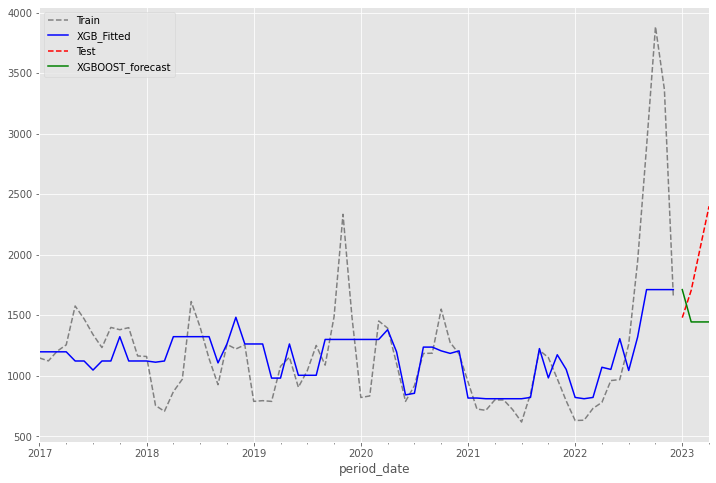

In [70]:
#Plotting
X__n["Kananga_Maize_meal_price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
X__nan['pred_box'].plot(color="b", legend=True, label="XGB_Fitted")
predictions["Kananga_Maize_meal_price"].plot(style="--",color="r", legend=True, label="Test")
predictions["XGBOOST"].plot(color="green", legend=True, label="XGBOOST_forecast");

In [71]:
accuracy(predictions["Kananga_Maize_meal_price"],predictions["XGBOOST"])

,RMSE,%MAPE,%SMAPE
0,592.7,25.1,28.895071


In [ ]:
help(sm.tsa.SARIMAX)

In [72]:
rmse = []
for train_index, test_index in tscv.split(X__n):
    cv_train, cv_test = X__n[['Kananga_Maize_meal_price_box_train']].iloc[train_index], X__n[['Kananga_Maize_meal_price_box_train']].iloc[test_index]
    
    arma = sm.tsa.SARIMAX(cv_train, order=(1, 0, 1), seasonal_order=(0, 0, 0, 12), enforce_stationarity=False).fit(maxiter=10000, method='bfgs', disp=True)
    
    predictionss = arma.predict(cv_test.index.values[0], cv_test.index.values[-1], axis=1)
    true_values = cv_test.values
    rmse.append(math.sqrt(mean_squared_error(true_values, predictionss)))
    
print("RMSE: {}".format(np.mean(rmse)))

Optimization terminated successfully.
         Current function value: -5.589137
         Iterations: 9
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: -5.589843
         Iterations: 9
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: -5.600068
         Iterations: 9
         Function evaluations: 118
         Gradient evaluations: 106
         Current function value: -5.605121
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: -5.615546
         Iterations: 9
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: -5.617573
         Iterations: 10
         Function evaluations: 139
         Gradient evaluations: 124
Optimization terminated successfully.
         Current function value: -5.62

In [73]:
#start = len(X_)
#end = len(X_) +len(Y) -1

In [74]:
sig=np.sum((X__n['Kananga_Maize_meal_price_box_train'].values - arma.predict(X__n.index.values[0], X__n.index.values[-1]).values)**2)
sig=np.sqrt(sig / (len(X__n)-1))
corr_fac=X__n[['Kananga_Maize_meal_price']].values.sum()/arma.predict(X__n.index.values[0], X__n.index.values[-1]).values.sum()

In [78]:
#saar=arma.predict(start, end)

sarr=arma.predict(Y__n.index.values[0], Y__n.index.values[-1])

#sarr_inb=sarr.apply(lambda x: back(x, lam, sig))

sarr_inb = inv_boxcox(sarr, lam)

sarr_inb_ = corr_fac * sarr


#predictions["SARIMA"]=fitted_series_

predictions["SARIMA"]=sarr_inb.values

slog_fitted = arma.fittedvalues

#slog_fitted_inv_ = slog_fitted.apply(lambda x: back(x, lam, sig))

slog_fitted_inv_ = inv_boxcox(arma.fittedvalues, lam)

sarima_resid = arma.resid

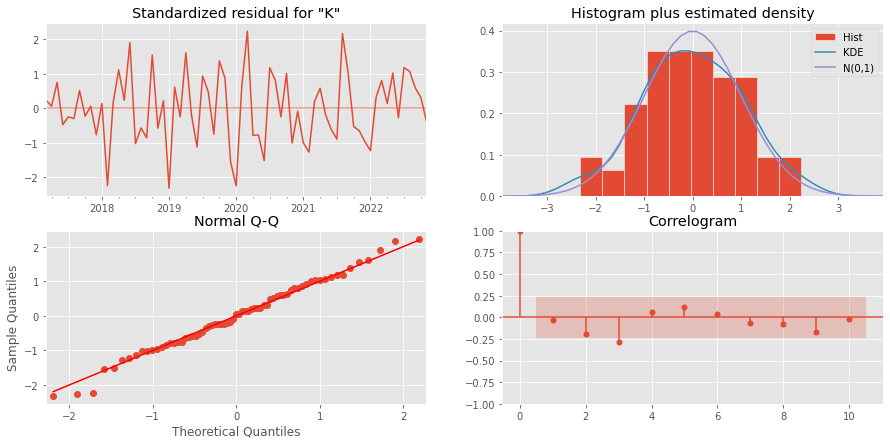

In [79]:
arma.plot_diagnostics();

In [80]:
predictions

,Kananga_Maize_meal_price,py_snaive,py_hw,LAdA,XGBOOST,SARIMA
period_date,,,,,,
2023-01-31,1479.75,630.0,1491.831477,1337.548421,1711.268803,3349.368642
2023-02-28,1705.00,632.5,1401.856578,1231.343256,1444.264571,3436.326460
2023-03-31,2052.50,730.0,1516.520783,1352.244291,1444.264571,3527.493121
2023-04-30,2400.00,780.0,1569.831902,1447.245669,1444.264571,3623.170943


In [ ]:
accuracy(predictions['Kananga_Maize_meal_price'], predictions['SARIMA'])

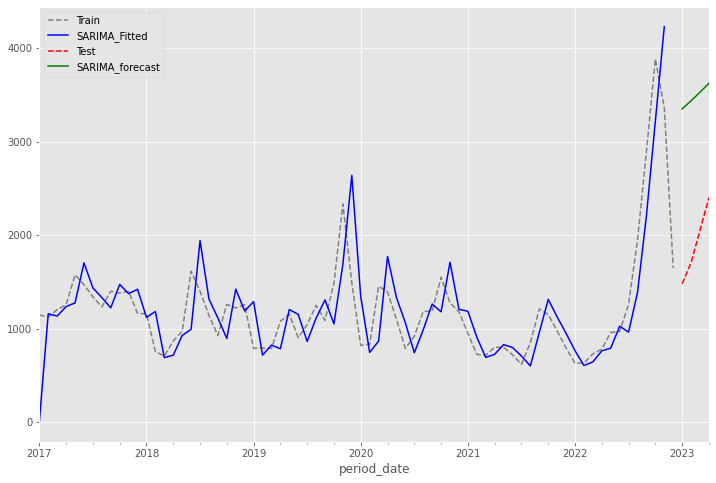

In [82]:
#Plotting
X__n["Kananga_Maize_meal_price"].plot(figsize=(12,8), style="--", color="gray", legend=True, label="Train")
slog_fitted_inv_.plot(color="b", legend=True, label="SARIMA_Fitted")
predictions["Kananga_Maize_meal_price"].plot(style="--",color="r", legend=True, label="Test")
predictions["SARIMA"].plot(color="green", legend=True, label="SARIMA_forecast");

In [122]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

def mape(A, F):
    return np.round(np.mean(np.abs((np.array(A) - np.array(F)) / np.array(A))) * 100,1)

In [123]:
print(math.sqrt(mean_squared_error(predictions["Kananga_Maize_meal_price"].values, predictions['SARIMA'])))
print(smape(predictions["Kananga_Maize_meal_price"], predictions['SARIMA']))
print(mape(predictions["Kananga_Maize_meal_price"], predictions['SARIMA']))

1594.107668604338
59.56579372658503
87.7


#### Comparison

In [79]:
forecasts = predictions.copy()
fc_melt=pd.melt(forecasts.reset_index(), 
        id_vars='period_date', 
        value_vars=forecasts.columns,
        var_name="Model", 
        value_name="Forecasts").round(0)

fc_melt.head()

,period_date,Model,Forecasts
0,2022-11-30,Kananga_Maize_meal_price,3363.0
1,2022-12-31,Kananga_Maize_meal_price,1649.0
2,2023-01-31,Kananga_Maize_meal_price,1480.0
3,2023-02-28,Kananga_Maize_meal_price,1705.0
4,2023-03-31,Kananga_Maize_meal_price,2052.0


In [83]:
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['period_date'], empty='none')

# The basic line
line = alt.Chart(fc_melt).mark_line(point=True).encode(
    x='period_date',
    y=alt.Y('Forecasts:Q',scale=alt.Scale(domain=[500,4000], clamp=True)),
    color='Model:N',
    tooltip=['period_date','Forecasts','Model']
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(fc_melt).mark_point().encode(
    x='period_date',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', baseline='top', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Forecasts:Q', alt.value('              '))
)
text2 = line.mark_text(align='left', baseline='bottom', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Model:N', alt.value('    '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(fc_melt).mark_rule(color='gray').encode(
    x='period_date',
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    line, selectors, points, rules, text, text2
).properties(
    width=800, height=500, title="Comaprison of various Forecasting Models"
).interactive()

alt.LayerChart(...)